# 이미지 필터링 테스트

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = plt.imread('bob.jpg')
img.shape

(220, 220, 3)

In [3]:
img.max(), img.min()

(255, 0)

In [4]:
img = img/255.
img.max(), img.min()

(1.0, 0.0)

In [9]:
img[:5,:5,0]

array([[0.40784314, 0.28627451, 0.34901961, 0.37647059, 0.41568627],
       [0.3372549 , 0.16470588, 0.20784314, 0.23137255, 0.29019608],
       [0.43921569, 0.21960784, 0.21960784, 0.20392157, 0.24705882],
       [0.41568627, 0.2       , 0.23529412, 0.23921569, 0.27058824],
       [0.51372549, 0.25490196, 0.22745098, 0.22745098, 0.22745098]])

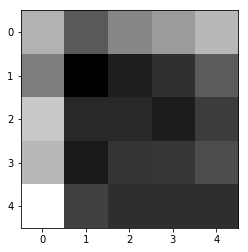

In [10]:
plt.imshow(img[:5,:5,0], cmap='gray')

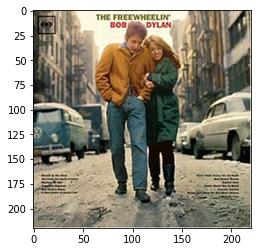

In [6]:
plt.imshow(img)

In [12]:
a = np.array([[1,2,3], [3,2,1], [3,0,3]])
f = np.array([[1,0,1], [0,1,0], [1,0,1]])
display(a,f)

array([[1, 2, 3],
       [3, 2, 1],
       [3, 0, 3]])

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

### Filtering

In [13]:
(a*f).sum()

12

In [17]:
a = np.array([[0.1, 0.4, 0.9], [0.9, 0.5, 0.2], [0.8, 0, 0.8]])
f = np.array([[1.,0,1.], [0,1,0], [1,0,1]])/5
display(a,f)

array([[0.1, 0.4, 0.9],
       [0.9, 0.5, 0.2],
       [0.8, 0. , 0.8]])

array([[0.2, 0. , 0.2],
       [0. , 0.2, 0. ],
       [0.2, 0. , 0.2]])

In [18]:
(a*f).sum()

0.6200000000000001

In [19]:
a = np.random.rand(5,5)
f = np.array([[1.,0,1.], [0,1,0], [1,0,1]])/5
display(a,f)

array([[0.86895653, 0.32892693, 0.20645918, 0.50106424, 0.3913948 ],
       [0.68258122, 0.63442222, 0.30863812, 0.10373542, 0.03131191],
       [0.09855919, 0.40460718, 0.19290488, 0.48761239, 0.6794497 ],
       [0.1688319 , 0.12448364, 0.11172472, 0.57854014, 0.66655421],
       [0.56605133, 0.413369  , 0.71461737, 0.52271824, 0.83608161]])

array([[0.2, 0. , 0.2],
       [0. , 0.2, 0. ],
       [0.2, 0. , 0.2]])

In [20]:
(a[:3,:3]*f).sum()

0.40026040234579796

In [21]:
(a[:3,1:4]*f).sum()

0.4061697736001726

In [22]:
(a[:3,2:5]*f).sum()

0.3147887941383587

In [23]:
(a[1:4,:3]*f).sum()

0.3352766287746769

In [24]:
T = np.zeros([5,5])
T

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [25]:
for row in range(5-2):
    for col in range(5-2):
        T[row,col] = (a[row:row+3, col:col+3]*f).sum()
        
T

array([[0.4002604 , 0.40616977, 0.31478879, 0.        , 0.        ],
       [0.33527663, 0.32681726, 0.32116827, 0.        , 0.        ],
       [0.33932328, 0.38800631, 0.60031874, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [26]:
T = np.array([ [(a[row:row+3, col:col+3]*f).sum() for col in range(5-2)]
          for row in range(5-2)])
T

array([[0.4002604 , 0.40616977, 0.31478879],
       [0.33527663, 0.32681726, 0.32116827],
       [0.33932328, 0.38800631, 0.60031874]])

In [27]:
img.shape

(220, 220, 3)

In [28]:
gray = img[:,:,0]
gray.shape

(220, 220)

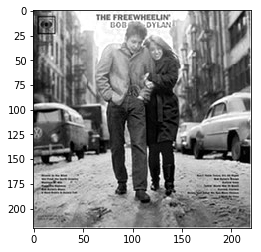

In [29]:
plt.imshow(gray, cmap='gray')

In [39]:
f = np.array([[1., 1, 1.], [0, 0, 0], [1, 1, 1]])/6

In [40]:
T = np.zeros([gray.shape[0],gray.shape[1]])

In [41]:
for row in range(gray.shape[0]-(len(f)-1)):
    for col in range(gray.shape[1]-(len(f)-1)):
        T[row,col] = (gray[row:row+len(f), col:col+len(f)]*f).sum()
        
T.shape

(220, 220)

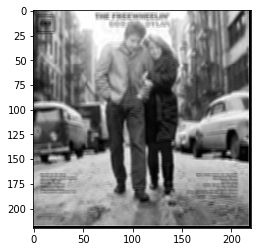

In [42]:
plt.imshow(T, cmap='gray')

In [62]:
f = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

In [63]:
T = np.zeros([gray.shape[0],gray.shape[1]])

In [64]:
for row in range(gray.shape[0]-(len(f)-1)):
    for col in range(gray.shape[1]-(len(f)-1)):
        T[row,col] = (gray[row:row+len(f), col:col+len(f)]*f).sum()
        
T.shape

(220, 220)

In [65]:
T[T<0]=0
T[T>1]=1

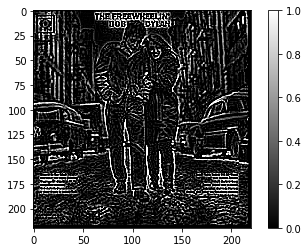

In [66]:
plt.imshow(T, cmap='gray')
plt.colorbar()

### Pooling
- Max Pooling

In [71]:
T = np.zeros([gray.shape[0]//2,gray.shape[1]//2])

In [72]:
for row in range(gray.shape[0]//2):
    for col in range(gray.shape[1]//2):
        T[row,col] = (gray[row*2:row*2+2, col*2:col*2+2]).max()
        
T.shape

(110, 110)

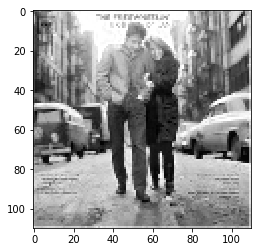

In [73]:
plt.imshow(T, cmap='gray')

### 필터링과 풀링 연속 적용

In [88]:
f = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

In [89]:
C = np.zeros([gray.shape[0]-2,gray.shape[1]-2])

In [90]:
for row in range(gray.shape[0]-(len(f)-1)):
    for col in range(gray.shape[1]-(len(f)-1)):
        C[row,col] = (gray[row:row+len(f), col:col+len(f)]*f).sum()
        
C.shape

(218, 218)

In [91]:
C[C<0]=0
C[C>1]=1

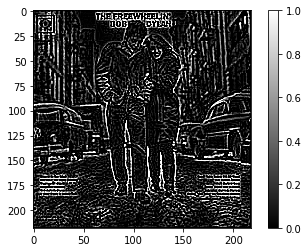

In [92]:
plt.imshow(C, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

In [101]:
P = np.zeros([C.shape[0]//2,C.shape[1]//2])

In [102]:
for row in range(C.shape[0]//2):
    for col in range(C.shape[1]//2):
        P[row,col] = (C[row*2:row*2+2, col*2:col*2+2]).max()
        
P.shape

(109, 109)

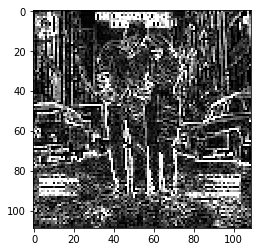

In [103]:
plt.imshow(P, cmap='gray', vmin=0, vmax=1)

### 3차원 필터링

In [111]:
f = np.array([[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],
              [[-1,-1,-1],[8,8,8],[-1,-1,-1]],
              [[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]]])
f.shape

(3, 3, 3)

In [112]:
C = np.zeros([img.shape[0]-2, img.shape[1]-2])

In [113]:
for row in range(img.shape[0]-(len(f)-1)):
    for col in range(img.shape[1]-(len(f)-1)):
        C[row,col] = (img[row:row+len(f), col:col+len(f)]*f).sum()
        
C.shape

(218, 218)

In [114]:
C[C<0]=0
C[C>1]=1

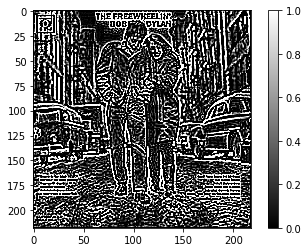

In [115]:
plt.imshow(C, cmap='gray', vmin=0, vmax=1)
plt.colorbar()